# 生成数组的函数

## arange

arange类似于python中的range函数，只不过返回的不是列表，而是数组：\
`arange(start, stop=None, step=1, dtype=None)`

In [2]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

In [3]:
np.arange(0,2*np.pi,np.pi/4)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

In [4]:
np.arange(0,2*np.pi,np.pi/4,dtype=np.float32)

array([0.       , 0.7853982, 1.5707964, 2.3561945, 3.1415927, 3.926991 ,
       4.712389 , 5.4977875], dtype=float32)

由于存在精度问题，使用浮点数可能出现问题。下面stop的值2.1出现在了数组中，所以使用浮点数的时候要注意。

In [5]:
np.arange(1.5,2.1,0.3)

array([1.5, 1.8, 2.1])

## linspace

`linspace(start,stop,N)`

In [6]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## logspace

`logspace(start.stop,N)`默认以10为底

In [7]:
np.logspace(0,1,5)

array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ])

## meshgrid

In [8]:
x_ticks = np.linspace(-1,1,5)
y_ticks = np.linspace(-1,1,5)

x,y = np.meshgrid(x_ticks,y_ticks) # x对应网格的第一维，y对应第二维

In [9]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [10]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

<ipython-input-11-79c7f7c2d053>:8: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

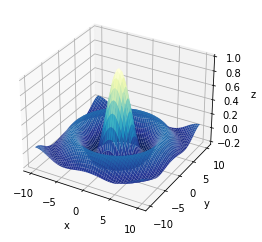

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x,y):
    r = np.sqrt(x**2 + y**2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10,10,51)
y_ticks = np.linspace(-10,10,51)

x,y = np.meshgrid(x_ticks,y_ticks)
z = f(x,y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1,cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

事实上，x和y中有很多冗余的元素，这里提供了一个sparse的选项：

In [12]:
x_ticks = np.linspace(-1,1,5)
y_ticks = np.linspace(-1,1,5)

x,y = np.meshgrid(x_ticks,y_ticks,sparse=True)

In [13]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [14]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

这样，x和y变成了一维行向量和列向量。得到的结果一样。

<ipython-input-11-79c7f7c2d053>:8: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

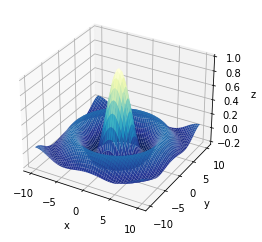

In [15]:
x_ticks = np.linspace(-10,10,51)
y_ticks = np.linspace(-10,10,51)

x,y = np.meshgrid(x_ticks,y_ticks)
z = f(x,y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1,cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

meshgrid可以设置轴排列的先后顺序：
- 默认为indexing='xy'，即笛卡尔坐标，对于2维数组，返回行向量x和列向量y。
- 或者使用indexing='ij'，即矩阵坐标，对于2维数组，返回列向量x和行向量y。

## ogrid和mgrid

Matlab中有`meshgrid`的用法：`meshgrid(-1:.5:1,-1:.5:1)`。\
Numpy的`meshgrid`不支持这样的用法，可以使用`ogrid/mgrid`来实现类似这样的用法。\
`ogrid`与`mgrid`的区别在于：
- `ogrid`相当于`meshgrid(indexing='ij',sparse=True)`。
- `mgrid`相当于`meshgrid(indexing='ij',sparse=False)`。

In [16]:
x,y = np.ogrid[-1:1:.5,-1:1:.5]

In [17]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [18]:
y

array([[-1. , -0.5,  0. ,  0.5]])

注意：
- 这里使用的是中括号；
- Matlab使用的是`start:step:end`的表示，Numpy使用的是`start:end:step`的表示
- 这里的结果不包括end的值

为了包含`end`的值，可以在`step`的位置传入一个复数`5j`，表示我们需要一个`5`个数值的数组，此时返回值就会包含`end`的值。

In [19]:
x,y = np.ogrid[-1:1:5j,-1:1:5j]

In [20]:
x,y

(array([[-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ]]),
 array([[-1. , -0.5,  0. ,  0.5,  1. ]]))

<ipython-input-11-79c7f7c2d053>:8: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

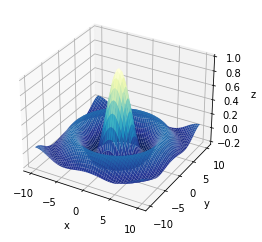

In [23]:
y,x = np.ogrid[-10:10:51j,-10:10:51j]
z = f(x,y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1,cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## `r_`, `c_`

In [24]:
np.r_[0:1:.1] # 行向量

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [25]:
np.r_[0:1:5j] # 复数步长指定数组长度

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [26]:
np.r_[(3,22,11),4.0,[15,6]]

array([ 3., 22., 11.,  4., 15.,  6.])

In [27]:
np.c_[1:3:5j] # 列向量

array([[1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ]])

## ones，zeros

In [28]:
np.zeros(3)

array([0., 0., 0.])

In [31]:
np.ones([2,3],dtype=np.float32)

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [34]:
np.ones([2,3])*5

array([[5., 5., 5.],
       [5., 5., 5.]])

## empty

使用`empty`方法产生一个指定大小的数组（数组所指向的内存未被初始化，所以值随机），再用`fill`方法填充

In [36]:
a = np.empty(2)
a

array([inf, inf])

In [38]:
a.fill(5)
a

array([5., 5.])

或者使用索引填充，不过速度稍微慢一些

In [39]:
a[:] = 5
a

array([5., 5.])

## empty_like, ones_like, zeros_like

In [52]:
a = np.arange(0,10,2.5)
a

array([0. , 2.5, 5. , 7.5])

In [53]:
np.empty_like(a)

array([0. , 2.5, 5. , 7.5])

In [54]:
np.zeros_like(a)

array([0., 0., 0., 0.])

In [55]:
np.ones_like(a)

array([1., 1., 1., 1.])

## identity

In [56]:
np.identity(3) # n*n单位矩阵

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])